<a href="https://colab.research.google.com/github/girupashankar/Machine_Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Linear Regression**

#### Working Principle:
Linear regression models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data. The equation can be written as:

*
y=β
0
​
 +β
1
​
 x
1
​
 +β
2
​
 x
2
​
 +⋯+β
n
​
 x
n
​
 +ϵ

where:
*
𝑦
y is the dependent variable.
*
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑛
x
1
​
 ,x
2
​
 ,…,x
n
​
  are the independent variables.
*
𝛽
0
,
𝛽
1
,
…
,
𝛽
𝑛
β
0
​
 ,β
1
​
 ,…,β
n
​
  are the coefficients.
*
𝜖
ϵ is the error term.



## Example 1: Predicting House Prices

#### Problem Statement:
You have a dataset containing information about houses in a particular area, including the size of the house (in square feet) and its price. You want to create a linear regression model to predict the price of a house based on its size.

#### Dataset:
Let's assume we have the following dataset:

| Size (sq ft) | Price ($)  |
|--------------|------------|
| 1500         | 300,000    |
| 1600         | 320,000    |
| 1700         | 340,000    |
| 1800         | 360,000    |
| 1900         | 380,000    |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# Features (size of the house)
X = np.array([1500, 1600, 1700, 1800, 1900]).reshape(-1, 1)

# Target (price of the house)
y = np.array([300000, 320000, 340000, 360000, 380000])


In [3]:
print(X)

[[1500]
 [1600]
 [1700]
 [1800]
 [1900]]


In [4]:
print(y)

[300000 320000 340000 360000 380000]


In [5]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the dataset
model.fit(X, y)


LinearRegression()

In [6]:
# Predict the price of a house with size 2000 sq ft
size_new = np.array([[2000]])
price_pred = model.predict(size_new)

print(f"Predicted price for a house with 2000 sq ft: ${price_pred[0]:,.2f}")


Predicted price for a house with 2000 sq ft: $400,000.00


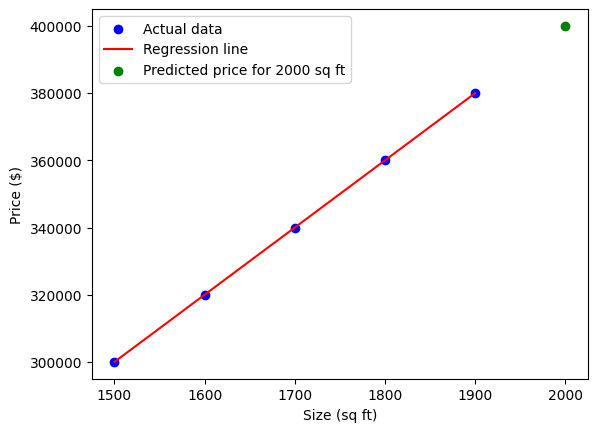

In [7]:
# Plot the original data points
plt.scatter(X, y, color='blue', label='Actual data')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression line')

# Plot the prediction for the new data point
plt.scatter(size_new, price_pred, color='green', label='Predicted price for 2000 sq ft')

# Add labels and legend
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


#### Explanation:

- **Data Preparation**: We prepared the feature (`X`) and target (`y`) arrays. The feature is the size of the house, and the target is the price.
- **Model Training**: We created a linear regression model and trained it using the dataset.
- **Prediction**: We predicted the price of a house with 2000 sq ft using the trained model.
- **Visualization**: We visualized the original data points, the regression line, and the predicted price for the new data point.

This example illustrates how to use linear regression to predict house prices based on their size. If you have any specific questions or need further details, feel free to ask! 😊

## EXample 2: Diabetes prediction

**Linear Regression Example**
* The example below uses only the first feature of the diabetes dataset, in order to illustrate the data points within the two-dimensional plot. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.
* The coefficients, residual sum of squares and the coefficient of determination are also calculated.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
diabetes_data = datasets.load_diabetes()
print(diabetes_data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [10]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [11]:
print(diabetes_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [12]:
print(diabetes_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

This line of code selects only the third feature (index 2) of the diabetes_X data and reshapes it into a 3-dimensional array with one feature.

Here's a breakdown of what each part of the code does:

* diabetes_X[:, np.newaxis, 2]:

  * [:, np.newaxis, :]: This part selects all rows of the diabetes_X data and creates a new axis (dimension) for the selected feature.
  * 2: This index specifies which feature to select (the third feature, as indexing starts from 0).
* np.newaxis: This creates a new axis (dimension) in the array.

So, the resulting array will have dimensions (n_samples, 1, 1), where n_samples is the number of data points in the original diabetes_X data.

In [15]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [16]:
print(diabetes_X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [17]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [19]:
print(diabetes_X_train)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [18]:
print(diabetes_X_test)

[[ 0.07786339]
 [-0.03961813]
 [ 0.01103904]
 [-0.04069594]
 [-0.03422907]
 [ 0.00564998]
 [ 0.08864151]
 [-0.03315126]
 [-0.05686312]
 [-0.03099563]
 [ 0.05522933]
 [-0.06009656]
 [ 0.00133873]
 [-0.02345095]
 [-0.07410811]
 [ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]


In [22]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [23]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [24]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [25]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [26]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


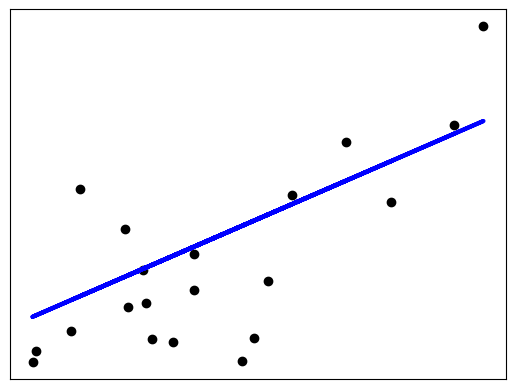

In [29]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()